<a href="https://colab.research.google.com/github/BASICSSS/Reuters-News-Classification/blob/main/Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
train_labels[2]

3

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])   #궁금하여 디코딩

In [ ]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(8982,)
(8982,)
(2246,)
(2246,)


In [ ]:
import numpy as np
from keras.utils.np_utils import to_categorical


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data) 
x_test = vectorize_sequences(test_data) 

In [ ]:
x_train.shape

(8982, 10000)

In [ ]:
to_one_train_labels = to_categorical(train_labels) 
to_one_test_labels = to_categorical(test_labels) # 형태를 맞춰주기 위한 원핫인코딩

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
to_one_train_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=64, activation='relu', input_shape=(10000,)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000,]
y_val = to_one_train_labels[:1000,]

partial_x_train = x_train[1000:,] #학습을 위해 학습데이터와 레이블의 개수를 맞춰주어야함.
partial_y_train = to_one_train_labels[1000:,] 

In [ ]:
print(x_val.shape)
print(y_val.shape)
print(partial_x_train.shape)
print(partial_y_train.shape)

(1000, 10000)
(1000, 46)
(7982, 10000)
(7982, 46)


In [ ]:
history = model.fit(partial_x_train, partial_y_train, epochs=20 ,batch_size = 512, validation_data=(x_val,y_val))

Epoch 1/20
16/16 [==============================] - 2s 69ms/step - loss: 3.1765 - accuracy: 0.3476 - val_loss: 1.8547 - val_accuracy: 0.6110
Epoch 2/20
16/16 [==============================] - 1s 47ms/step - loss: 1.6203 - accuracy: 0.6776 - val_loss: 1.3292 - val_accuracy: 0.7080
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.1095 - accuracy: 0.7721 - val_loss: 1.1417 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 0.8533 - accuracy: 0.8221 - val_loss: 1.0618 - val_accuracy: 0.7830
Epoch 5/20
16/16 [==============================] - 1s 49ms/step - loss: 0.6766 - accuracy: 0.8616 - val_loss: 0.9728 - val_accuracy: 0.7970
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.5448 - accuracy: 0.8871 - val_loss: 0.9408 - val_accuracy: 0.8090
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.4551 - accuracy: 0.9068 - val_loss: 0.9415 - val_accuracy: 0.7970
Epoch 8/20
16

In [ ]:
model.evaluate(x_test,to_one_test_labels )

71/71 [==============================] - 0s 3ms/step - loss: 1.2631 - accuracy: 0.7769


[1.263141393661499, 0.7769367694854736]

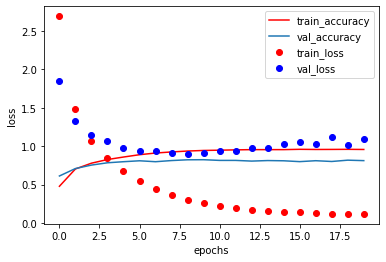

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'],'r',label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['loss'],'ro' ,label='train_loss')
plt.plot(history.history['val_loss'],'bo',label='val_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

(8982,)